In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Data

In [2]:
data = pd.read_csv('./dataset/iris.data',header=None)

In [3]:
data.columns= ['SepalLenght','SepalWidth','PetalLength','PetalWidth','class']
data.head()

,SepalLenght,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import seaborn as sns

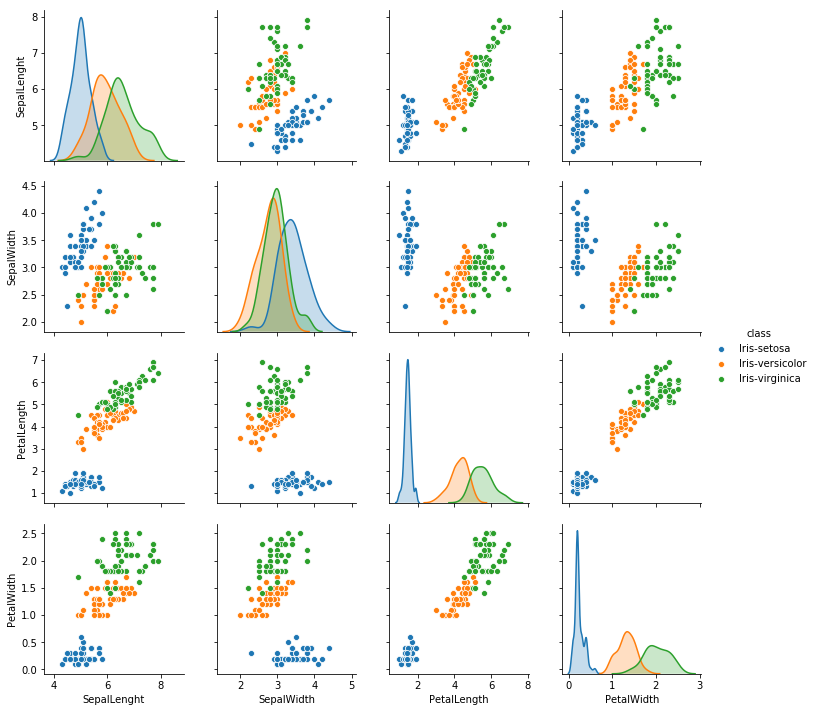

In [5]:
sns.pairplot(data,hue='class')

In [6]:
# Petal Width and Petal Length

In [7]:
data_new = data[['PetalLength','PetalWidth','class']]

In [8]:
data_new.head()

,PetalLength,PetalWidth,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


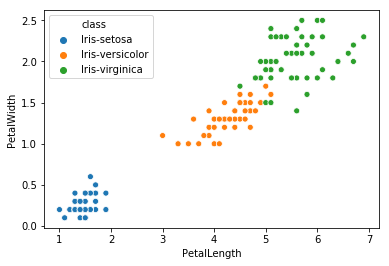

In [9]:
sns.scatterplot(x='PetalLength',y='PetalWidth',hue='class',data=data_new)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
data_new['class'] = le.fit_transform(data_new['class'])
data_new.head()

C:\Users\srikanth\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PetalLength,PetalWidth,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_new.iloc[:,0:2],
                                                 data_new.iloc[:,-1],
                                                test_size = 0.2)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
classifier = KNeighborsClassifier(n_neighbors=11)

In [18]:
classifier.fit(x_train, y_train) # traning model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
# Testing Accuracy 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [21]:
cm

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  8]], dtype=int64)

In [22]:
x_train = x_train.values
y_train = y_train.values

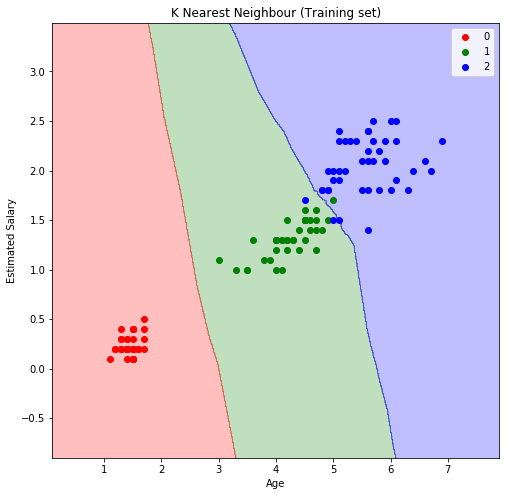

In [23]:
# Visualising the Training set results
plt.figure(figsize =(8,8))
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               color = ['red', 'green','blue'][i], label = j)

#plt.scatter(X_set[:,0],X_set[:,1] ,color = 'blue')
    
plt.title('K Nearest Neighbour (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [24]:
from sklearn.externals import joblib

In [25]:
joblib.dump(classifier,'irisclass.pkl')

['irisclass.pkl']

In [26]:
model = joblib.load('irisclass.pkl')

In [27]:
model.predict(np.array([[5,3]]))

array([2], dtype=int64)

In [28]:
model.predict_proba(np.array([[4.5,2]]))

array([[0.        , 0.54545455, 0.45454545]])

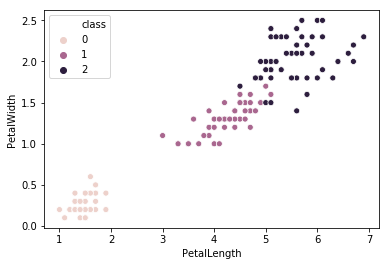

In [29]:
sns.scatterplot(x='PetalLength',y='PetalWidth',hue='class',data=data_new)

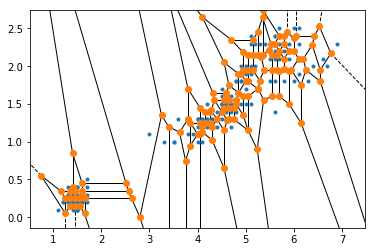

In [30]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train)
voronoi_plot_2d(vor)
plt.show()